# Calculating the absolute and relative differential TSS expression

In [1]:
.libPaths("/no_backup/jferrer/jmidgley/R_libs")
library(dplyr)
library(Seurat)
library(harmony)
library(Matrix)
library(ggplot2)
library(showtext)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built with package ‘Matrix’ 1.7.3 but the current
version is 1.7.4; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Loading required package: Rcpp

Loading required package: sysfonts

Loading required package: showtextdb



In [2]:
font_add("Latin Modern Math", "../data_raw/fonts/LatinmodernmathRegular.otf")
showtext_auto()

In [3]:
SO_merged <- readRDS("../data_processed/VASAseq/VASAseq_tx_level_all.RDS")

In [4]:
head(SO_merged@meta.data, 5)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.5,seurat_clusters,Donor,Disease
,<chr>,<dbl>,<int>,<dbl>,<fct>,<fct>,<chr>,<chr>
HUB-NG-v005_HUB.NG.v005_301,HUB.NG.v005,3635,1173,0,9,9,GPRL,ND
HUB-NG-v005_HUB.NG.v005_201,HUB.NG.v005,3239,1009,0,4,4,GPRL,ND
HUB-NG-v005_HUB.NG.v005_304,HUB.NG.v005,6201,1567,0,9,9,GPRL,ND
HUB-NG-v005_HUB.NG.v005_379,HUB.NG.v005,9046,2350,0,9,9,GPRL,ND
HUB-NG-v005_HUB.NG.v005_331,HUB.NG.v005,10401,2338,0,9,9,GPRL,ND


In [5]:
unique(SO_merged@meta.data$Disease)

[1] "ND"  "T2D"

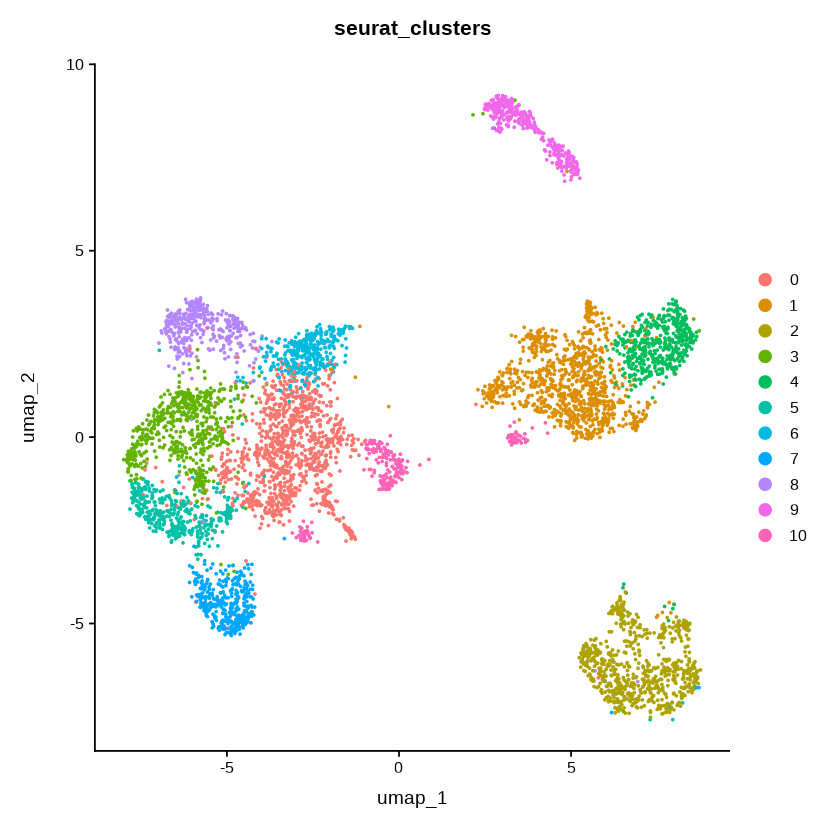

In [6]:
DimPlot(SO_merged, reduction = "umap", group.by = "seurat_clusters")

In [7]:
celltype_mapping <- readRDS("../data_processed/VASAseq/celltype_mapping.rds")

In [8]:
SO_merged@meta.data$CellType <- celltype_mapping[rownames(SO_merged@meta.data)]

In [9]:
head(SO_merged@meta.data, 5)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.5,seurat_clusters,Donor,Disease,CellType
,<chr>,<dbl>,<int>,<dbl>,<fct>,<fct>,<chr>,<chr>,<chr>
HUB-NG-v005_HUB.NG.v005_301,HUB.NG.v005,3635,1173,0,9,9,GPRL,ND,Alpha
HUB-NG-v005_HUB.NG.v005_201,HUB.NG.v005,3239,1009,0,4,4,GPRL,ND,Beta
HUB-NG-v005_HUB.NG.v005_304,HUB.NG.v005,6201,1567,0,9,9,GPRL,ND,Alpha
HUB-NG-v005_HUB.NG.v005_379,HUB.NG.v005,9046,2350,0,9,9,GPRL,ND,Beta
HUB-NG-v005_HUB.NG.v005_331,HUB.NG.v005,10401,2338,0,9,9,GPRL,ND,Alpha


In [10]:
Idents(SO_merged) <- SO_merged@meta.data$CellType

In [11]:
table(Idents(SO_merged))


Alpha  Beta 
 3922  1926 

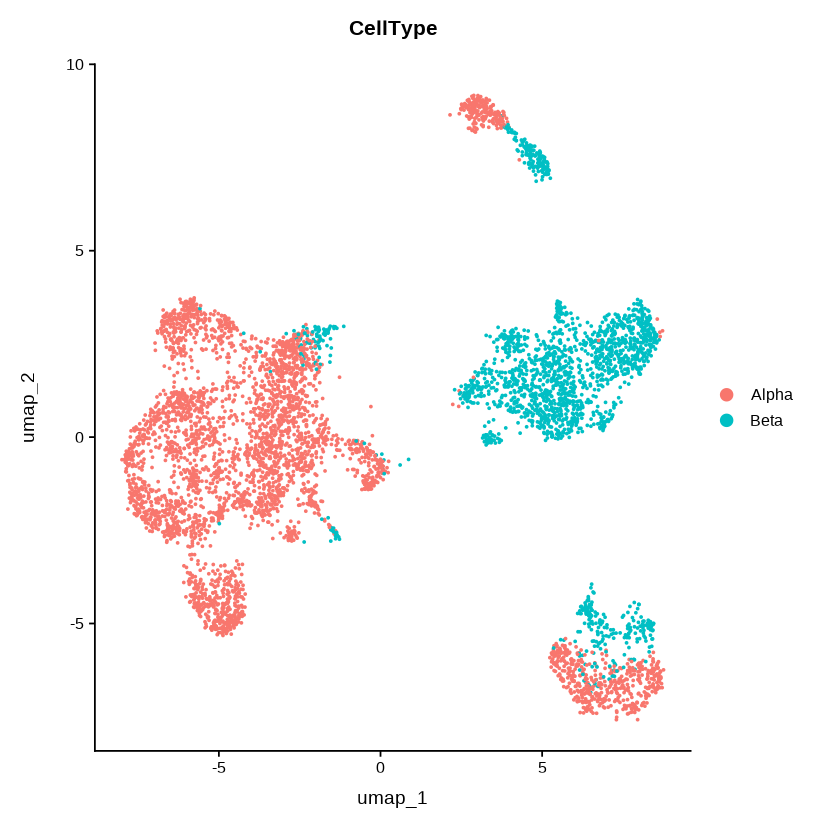

In [12]:
DimPlot(SO_merged, reduction = "umap", group.by = "CellType")

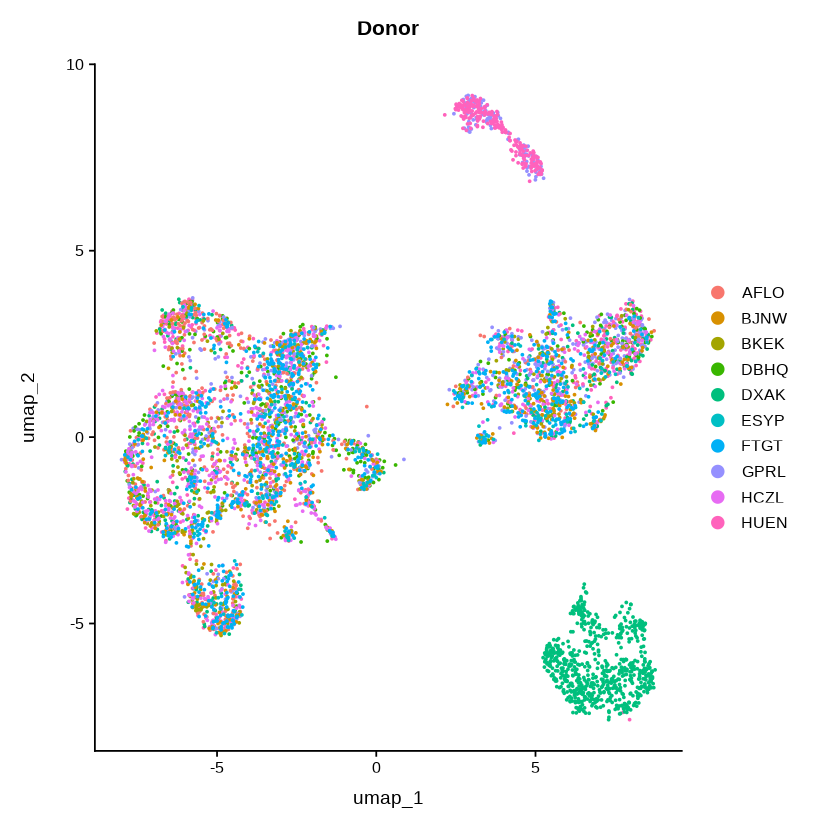

In [13]:
DimPlot(SO_merged, reduction = "umap", group.by = "Donor")

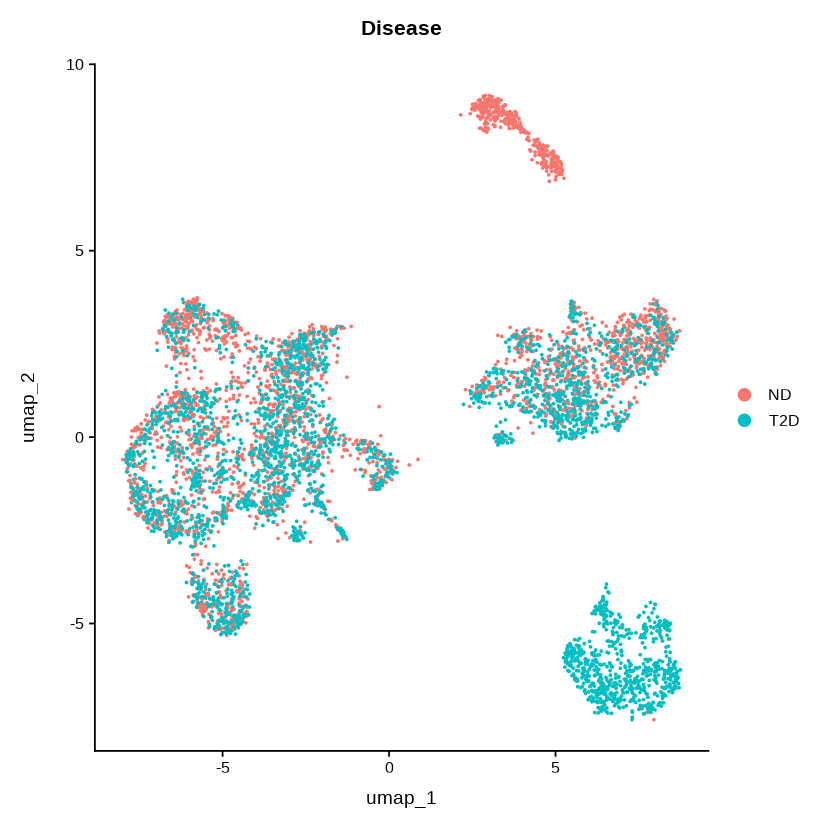

In [14]:
DimPlot(SO_merged, reduction = "umap", group.by = "Disease")

In [15]:
SO_ND <- subset(SO_merged, subset = Disease %in% c("ND"))

In [16]:
length(rownames(SO_ND))

[1] 100053

In [17]:
length(colnames(SO_ND))

[1] 2769

In [18]:
table(Idents(SO_ND))


Alpha  Beta 
 1834   935 

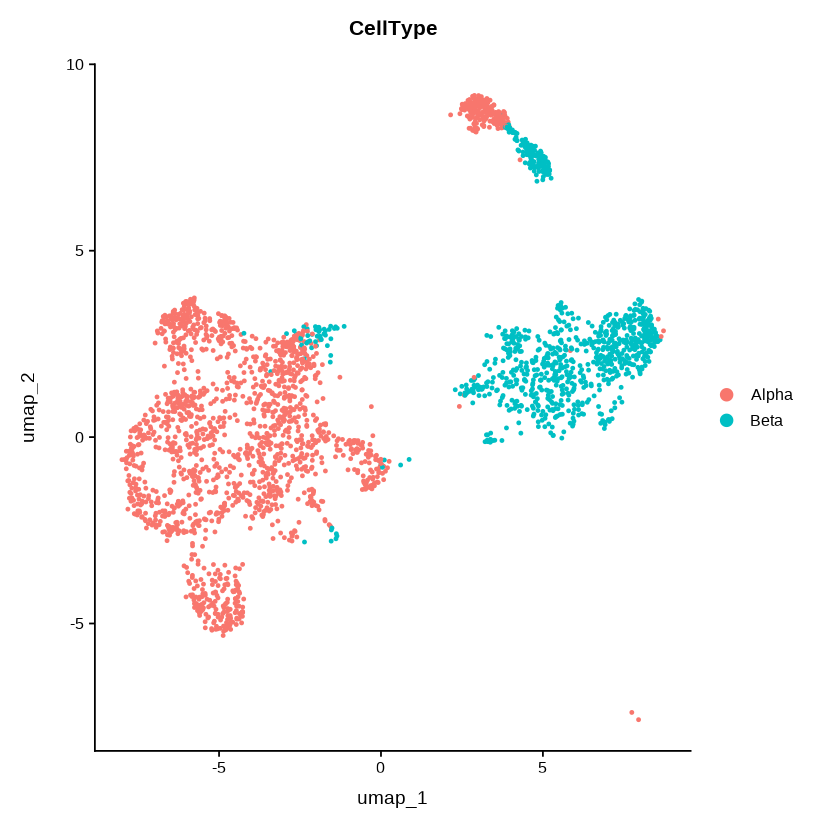

In [19]:
DimPlot(SO_ND, reduction = "umap", group.by = "CellType")

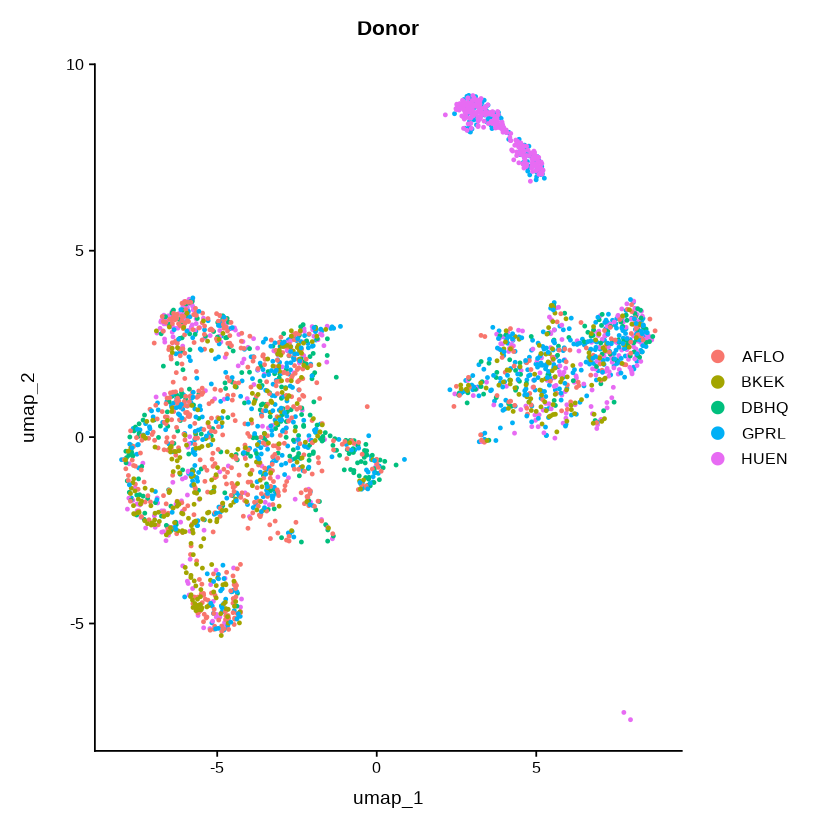

In [20]:
DimPlot(SO_ND, reduction = "umap", group.by = "Donor")

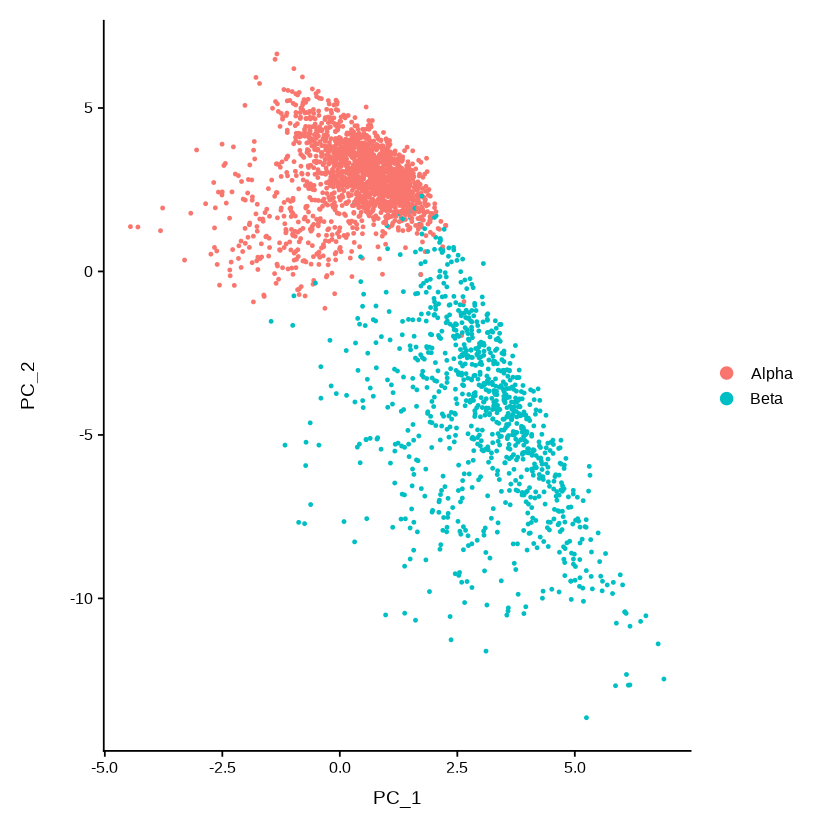

In [21]:
DimPlot(SO_ND, reduction = "pca")

In [22]:
combined_df <- read.delim("../data_processed/curated_HIT.tsv", header = TRUE, sep = "\t")

In [23]:
length(unique(combined_df$TSS_name))

[1] 40304

In [24]:
isoform_tss_map <- combined_df %>% select(transcript_id, TSS_name)

In [25]:
isoform_tss_map

transcript_id,TSS_name
<chr>,<chr>
ENCT00000006334.1,P3111_A
ENCT00000013056.1,P5604_A
ENCT00000019620.1,P7900_A
ENCT00000022754.1,P1212_A
ENCT00000039204.1,P7654_A
ENCT00000039480.1,P7768_A
ENCT00000039586.1,P7898_A
ENST00000008440.9,P7607_A
ENST00000040877.1,P7691_A


In [26]:
# keep only isoforms present in seurat object
isoform_tss_map <- isoform_tss_map[isoform_tss_map$transcript_id %in% rownames(SO_ND), ]

In [27]:
isoform_tss_map

,transcript_id,TSS_name
,<chr>,<chr>
1,ENCT00000006334.1,P3111_A
2,ENCT00000013056.1,P5604_A
4,ENCT00000022754.1,P1212_A
5,ENCT00000039204.1,P7654_A
14,ENST00000166244.3,P1191_A
21,ENST00000235307.6,P6350_A
32,ENST00000237724.5,P7250_A
35,ENST00000243189.7,P1359_A
39,ENST00000251195.5,P2053_A


In [28]:
counts_mat <- GetAssayData(SO_ND, assay = "RNA", layer = "counts")

In [29]:
tss_factor <- isoform_tss_map$TSS_name[match(rownames(counts_mat), isoform_tss_map$transcript_id)]

In [30]:
unique_tss <- unique(tss_factor)

In [31]:
group_mat <- sparseMatrix(
  i = 1:length(tss_factor),
  j = match(tss_factor, unique_tss),
  x = 1
)

In [32]:
rownames(group_mat) <- rownames(counts_mat)
colnames(group_mat) <- unique_tss

In [33]:
tss_counts <- t(group_mat) %*% counts_mat
tss_counts <- as(tss_counts, "dgCMatrix")

In [34]:
tss_counts

  [[ suppressing 32 column names ‘HUB-NG-v005_HUB.NG.v005_301’, ‘HUB-NG-v005_HUB.NG.v005_201’, ‘HUB-NG-v005_HUB.NG.v005_304’ ... ]]

  [[ suppressing 32 column names ‘HUB-NG-v005_HUB.NG.v005_301’, ‘HUB-NG-v005_HUB.NG.v005_201’, ‘HUB-NG-v005_HUB.NG.v005_304’ ... ]]

  [[ suppressing 32 column names ‘HUB-NG-v005_HUB.NG.v005_301’, ‘HUB-NG-v005_HUB.NG.v005_201’, ‘HUB-NG-v005_HUB.NG.v005_304’ ... ]]



29684 x 2769 sparse Matrix of class "dgCMatrix"
                                                                                           
P35_A      1   .    .   .    .    .   .   .   .   .    .   .   .    .   .   .    .   .    .
P129_A     1   .    .   .    .    .   .   2   .   .    2   .   .    3   .   .    2   .    .
P161_A     2   .    .   .    .    .   .   .   .   .    .   .   .    4   .   .    .   .    .
P277_U     1   9    4   .   34   20   9   1   .   .    4   .   1   12   6   6   15   .   11
P334_A     1   3    .   1    1    4   5   3   1   4    2   2   1    7   5   1    6   1    7
P545_A     1   .    .   .    .    .   .   1   .   .    .   .   .   10   .   .    .   .    1
P652_A     1   .    .   .    .    .   .   .   1   .    .   .   .    1   .   .    .   2    .
P713_A     2   1    2  44    .    1  16   4   7   9    .  12   3    6   .   1    .   1    6
P918_U     1   .    .   .    .    .   .   .   .   .    .   .   .    .   .   .    .   .    .
P1278_A    1   .    1   .    .  

In [35]:
tss_seurat <- CreateSeuratObject(
  counts = tss_counts,
  project = "TSS_level",
  meta.data = SO_ND@meta.data
)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [36]:
tss_seurat

An object of class Seurat 
29684 features across 2769 samples within 1 assay 
Active assay: RNA (29684 features, 0 variable features)
 1 layer present: counts

In [37]:
head(tss_seurat@meta.data, 5)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.5,seurat_clusters,Donor,Disease,CellType
,<chr>,<dbl>,<int>,<dbl>,<fct>,<fct>,<chr>,<chr>,<chr>
HUB-NG-v005_HUB.NG.v005_301,HUB.NG.v005,3635,1173,0,9,9,GPRL,ND,Alpha
HUB-NG-v005_HUB.NG.v005_201,HUB.NG.v005,3239,1009,0,4,4,GPRL,ND,Beta
HUB-NG-v005_HUB.NG.v005_304,HUB.NG.v005,6201,1567,0,9,9,GPRL,ND,Alpha
HUB-NG-v005_HUB.NG.v005_379,HUB.NG.v005,9046,2350,0,9,9,GPRL,ND,Beta
HUB-NG-v005_HUB.NG.v005_331,HUB.NG.v005,10401,2338,0,9,9,GPRL,ND,Alpha


In [38]:
Idents(tss_seurat) <- tss_seurat@meta.data$CellType
head(Idents(tss_seurat))

HUB-NG-v005_HUB.NG.v005_301 HUB-NG-v005_HUB.NG.v005_201 
                      Alpha                        Beta 
HUB-NG-v005_HUB.NG.v005_304 HUB-NG-v005_HUB.NG.v005_379 
                      Alpha                        Beta 
HUB-NG-v005_HUB.NG.v005_331 HUB-NG-v005_HUB.NG.v005_318 
                      Alpha                       Alpha 
Levels: Alpha Beta

In [39]:
tss_seurat <- NormalizeData(tss_seurat, normalization.method = "LogNormalize", scale.factor = 10000)

Normalizing layer: counts



In [40]:
tss_seurat

An object of class Seurat 
29684 features across 2769 samples within 1 assay 
Active assay: RNA (29684 features, 0 variable features)
 2 layers present: counts, data

In [41]:
tss_markers_df <- FindMarkers(tss_seurat, ident.1 = "Alpha", ident.2 = "Beta")

In [42]:
tss_markers_df <- tss_markers_df %>%
  mutate(TSS_name = gsub("-", "_", rownames(.)))

In [43]:
tss_markers_df

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,TSS_name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
P51798-A,0.000000e+00,-6.742647,0.067,0.865,0.000000e+00,P51798_A
P76033-A,0.000000e+00,-6.354324,0.077,0.867,0.000000e+00,P76033_A
P67946-A,0.000000e+00,-4.871273,0.150,0.890,0.000000e+00,P67946_A
P54072-A,0.000000e+00,-6.316317,0.041,0.711,0.000000e+00,P54072_A
P75980-U,5.803444e-295,-7.200256,0.025,0.644,1.722694e-290,P75980_U
P51580-A,9.114584e-280,-3.941020,0.303,0.874,2.705573e-275,P51580_A
P64881-U,2.184413e-265,-6.691190,0.013,0.575,6.484213e-261,P64881_U
P64879-A,5.577688e-264,-6.412938,0.014,0.578,1.655681e-259,P64879_A
P72610-U,1.216704e-253,-3.513855,0.148,0.771,3.611663e-249,P72610_U


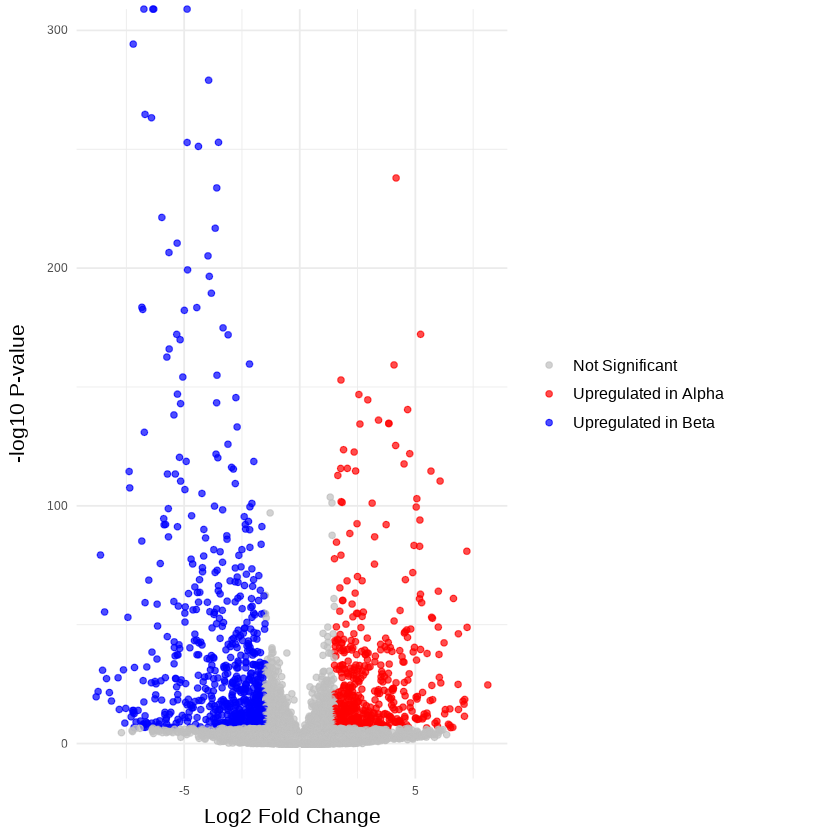

In [44]:
tss_markers_df$significance <- "Not Significant"
tss_markers_df$significance[tss_markers_df$avg_log2FC > 1.5 & tss_markers_df$p_val_adj < 0.01] <- "Upregulated in Alpha"
tss_markers_df$significance[tss_markers_df$avg_log2FC < -1.5 & tss_markers_df$p_val_adj < 0.01] <- "Upregulated in Beta"

ggplot(tss_markers_df, aes(x = avg_log2FC, y = -log10(p_val), color = significance)) +
  geom_point(alpha = 0.7, size = 1.5) +
  coord_cartesian(clip = "off") +
  scale_color_manual(values = c("Upregulated in Alpha" = "red",
                                "Upregulated in Beta"  = "blue",
                                "Not Significant"      = "grey")) +
  theme_minimal() +
  xlab("Log2 Fold Change") +
  ylab("-log10 P-value") +
  theme(
    axis.title = element_text(size = 16),
    legend.title = element_blank(),
    legend.text  = element_text(size = 12)
  )

In [45]:
tss_gene_map <- combined_df %>% select(TSS_name, Gene.name)

In [46]:
# Add gene names
gene_names <- tss_gene_map$Gene.name[match(tss_markers_df$TSS_name, tss_gene_map$TSS_name)]
tss_markers_df$Gene.name <- gene_names

In [47]:
alpha_tss <- tss_markers_df %>% filter(significance == "Upregulated in Alpha")
alpha_tss

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,TSS_name,significance,Gene.name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
P21366-A,1.189763e-238,4.167619,0.883,0.406,3.531692e-234,P21366_A,Upregulated in Alpha,KCTD12
P78593-A,6.906802e-173,5.227187,0.598,0.029,2.050215e-168,P78593_A,Upregulated in Alpha,DMD
P23382-A,5.264635e-160,4.078632,0.685,0.174,1.562754e-155,P23382_A,Upregulated in Alpha,SMOC1
P21484-A,1.171516e-153,1.782150,0.917,0.688,3.477529e-149,P21484_A,Upregulated in Alpha,HS6ST3
P72055-A,1.514493e-147,2.558076,0.788,0.375,4.495622e-143,P72055_A,Upregulated in Alpha,SLC7A2
P22927-A,2.571360e-145,2.940352,0.667,0.163,7.632824e-141,P22927_A,Upregulated in Alpha,SLC35F4
P62075-A,3.262722e-141,4.666438,0.568,0.072,9.685063e-137,P62075_A,Upregulated in Alpha,PPP2R2B
P3775-A,8.675988e-137,3.407111,0.639,0.164,2.575380e-132,P3775_A,Upregulated in Alpha,SLC44A3-AS1
P40736-A,1.877351e-135,3.851453,0.547,0.060,5.572728e-131,P40736_A,Upregulated in Alpha,RNF144A


In [48]:
head(alpha_tss$Gene.name, 20)

[1] "KCTD12"      "DMD"         "SMOC1"       "HS6ST3"      "SLC7A2"     
 [6] "SLC35F4"     "PPP2R2B"     "SLC44A3-AS1" "RNF144A"     "ABTB3"      
[11] "STARD13"     "GPC6"        "CACNB2"      "MAMLD1"      "MUC13"      
[16] "PPP2R2B"     "GLS"         "PRKCE"       "MAMLD1"      "HS3ST3B1"

In [49]:
# Unannotated and upregulated in alpha
alpha_tss %>% filter(grepl("_U$", TSS_name))

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,TSS_name,significance,Gene.name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
P62074-U,2.386654e-118,4.512440,0.482,0.041,7.084545e-114,P62074_U,Upregulated in Alpha,PPP2R2B
P67151-U,1.671497e-113,1.645809,0.899,0.679,4.961673e-109,P67151_U,Upregulated in Alpha,ZDHHC14
P21558-U,1.780772e-102,1.790345,0.799,0.478,5.286044e-98,P21558_U,Upregulated in Alpha,Peak_21558
P48642-U,4.626030e-84,4.941376,0.349,0.016,1.373191e-79,P48642_U,Upregulated in Alpha,ENSG00000229425
P57069-U,1.305306e-81,7.226469,0.351,0.025,3.874670e-77,P57069_U,Upregulated in Alpha,Peak_57069
P60754-U,1.812310e-78,1.502483,0.774,0.492,5.379662e-74,P60754_U,Upregulated in Alpha,ELL2
P55730-U,3.272541e-66,1.735280,0.631,0.325,9.714210e-62,P55730_U,Upregulated in Alpha,LPP
P62552-U,1.292743e-61,5.179512,0.273,0.014,3.837377e-57,P62552_U,Upregulated in Alpha,KCNIP1
P21563-U,2.248783e-56,1.729607,0.574,0.281,6.675289e-52,P21563_U,Upregulated in Alpha,Peak_21563


In [50]:
beta_tss <-tss_markers_df %>% filter(significance == "Upregulated in Beta") 
beta_tss

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,TSS_name,significance,Gene.name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
P51798-A,0.000000e+00,-6.742647,0.067,0.865,0.000000e+00,P51798_A,Upregulated in Beta,ZNF385D
P76033-A,0.000000e+00,-6.354324,0.077,0.867,0.000000e+00,P76033_A,Upregulated in Beta,TRPM3
P67946-A,0.000000e+00,-4.871273,0.150,0.890,0.000000e+00,P67946_A,Upregulated in Beta,HDAC9
P54072-A,0.000000e+00,-6.316317,0.041,0.711,0.000000e+00,P54072_A,Upregulated in Beta,CASR
P75980-U,5.803444e-295,-7.200256,0.025,0.644,1.722694e-290,P75980_U,Upregulated in Beta,TRPM3
P51580-A,9.114584e-280,-3.941020,0.303,0.874,2.705573e-275,P51580_A,Upregulated in Beta,SLC6A6
P64881-U,2.184413e-265,-6.691190,0.013,0.575,6.484213e-261,P64881_U,Upregulated in Beta,LRFN2
P64879-A,5.577688e-264,-6.412938,0.014,0.578,1.655681e-259,P64879_A,Upregulated in Beta,LRFN2
P72610-U,1.216704e-253,-3.513855,0.148,0.771,3.611663e-249,P72610_U,Upregulated in Beta,ENSG00000307759


In [51]:
head(beta_tss$Gene.name, 20)

[1] "ZNF385D"         "TRPM3"           "HDAC9"           "CASR"           
 [5] "TRPM3"           "SLC6A6"          "LRFN2"           "LRFN2"          
 [9] "ENSG00000307759" "VAT1L"           "IQSEC1"          "NAT8L"          
[13] "LDLRAD4"         "MEG8"            "KIRREL3"         "LDLRAD4"        
[17] "Peak_56843"      "KIRREL3"         "MEG8"            "NPTX2"

In [52]:
# Unannotated and upregulated in beta
beta_tss %>% filter(grepl("_U$", TSS_name))

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,TSS_name,significance,Gene.name
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
P75980-U,5.803444e-295,-7.200256,0.025,0.644,1.722694e-290,P75980_U,Upregulated in Beta,TRPM3
P64881-U,2.184413e-265,-6.691190,0.013,0.575,6.484213e-261,P64881_U,Upregulated in Beta,LRFN2
P72610-U,1.216704e-253,-3.513855,0.148,0.771,3.611663e-249,P72610_U,Upregulated in Beta,ENSG00000307759
P51552-U,6.368212e-252,-4.382109,0.132,0.734,1.890340e-247,P51552_U,Upregulated in Beta,IQSEC1
P24306-U,1.681643e-217,-3.654916,0.104,0.664,4.991789e-213,P24306_U,Upregulated in Beta,MEG8
P56843-U,7.101051e-206,-3.968015,0.084,0.611,2.107876e-201,P56843_U,Upregulated in Beta,Peak_56843
P24247-U,3.016882e-184,-6.828769,0.021,0.448,8.955312e-180,P24247_U,Upregulated in Beta,DLK1
P75996-U,2.425542e-183,-6.791581,0.008,0.418,7.199980e-179,P75996_U,Upregulated in Beta,Peak_75996
P16033-U,7.282537e-173,-5.320495,0.025,0.442,2.161748e-168,P16033_U,Upregulated in Beta,ENSG00000254938


In [53]:
write.csv(alpha_tss, "../data_processed/VASAseq/alpha_tss.csv", row.names = FALSE)

In [54]:
write.csv(beta_tss, "../data_processed/VASAseq/beta_tss.csv", row.names = FALSE)

## Relative TSS expression

In [55]:
genes_in_alpha_beta <- readRDS("../data_processed/VASAseq/genes_in_alpha_beta.rds")

In [56]:
# Keep only genes with more than one TSS & where gene is exressed in both cell types
tss_gene_map_filtered <- combined_df %>%
  select(TSS_name, Gene.name) %>%
  distinct() %>%  # remove duplicates
  filter(Gene.name %in% genes_in_alpha_beta) %>%   # genes expressed in both cell types
  group_by(Gene.name) %>%
  mutate(TSS_count = n()) %>%
  ungroup() %>%
  filter(TSS_count > 1)

tss_with_multiple <- unique(tss_gene_map_filtered$TSS_name)

In [57]:
length(tss_with_multiple)

[1] 28638

In [58]:
tss_gene_map_filtered

TSS_name,Gene.name,TSS_count
<chr>,<chr>,<int>
P3111_A,NFIA,5
P7900_A,CHRM3,3
P7654_A,ENSG00000300424,2
P7768_A,LYST,2
P7607_A,SPRTN,2
P4269_A,SIKE1,2
P1510_A,PIGV,2
P2074_A,TEKT2,2
P3673_A,TGFBR3,4


In [59]:
dup_tss <- tss_gene_map_filtered %>%
  count(TSS_name) %>%
  filter(n > 1)

dup_tss

TSS_name,n
<chr>,<int>
P10317_A,2
P10327_A,2
P10328_A,2
P10502_A,2
P10574_A,2
P10616_A,2
P10673_U,2
P106_A,2
P10992_A,2


In [60]:
# Account for TSSs used by more than one unique gene
tss_gene_map_filtered <- tss_gene_map_filtered %>%
  group_by(TSS_name) %>%
  mutate(weight = 1 / n()) %>%
  ungroup()

In [61]:
tss_gene_map_filtered

TSS_name,Gene.name,TSS_count,weight
<chr>,<chr>,<int>,<dbl>
P3111_A,NFIA,5,1.0
P7900_A,CHRM3,3,1.0
P7654_A,ENSG00000300424,2,0.5
P7768_A,LYST,2,1.0
P7607_A,SPRTN,2,1.0
P4269_A,SIKE1,2,1.0
P1510_A,PIGV,2,0.5
P2074_A,TEKT2,2,1.0
P3673_A,TGFBR3,4,1.0


In [62]:
tss_counts_filtered <- tss_counts[rownames(tss_counts) %in% tss_with_multiple, ]

In [63]:
# Build gene aggregation matrix (for normalization)
tss_gene_map_filtered <- tss_gene_map_filtered %>%
  filter(TSS_name %in% rownames(tss_counts_filtered))

unique_genes <- unique(tss_gene_map_filtered$Gene.name)

gene_tss_mat <- sparseMatrix(
  i = match(tss_gene_map_filtered$Gene.name, unique_genes),
  j = match(tss_gene_map_filtered$TSS_name, rownames(tss_counts_filtered)),
  x = tss_gene_map_filtered$weight
)
rownames(gene_tss_mat) <- unique_genes
colnames(gene_tss_mat) <- rownames(tss_counts_filtered)

In [64]:
# convert gene x TSS to gene x cell 
gene_counts <- gene_tss_mat %*% tss_counts_filtered

In [65]:
# match each TSS to its gene
gene_for_tss <- tss_gene_map_filtered$Gene.name[match(rownames(tss_counts_filtered), 
                                                      tss_gene_map_filtered$TSS_name)]

In [66]:
# Get total gene expression for each TSS
gene_totals <- gene_counts[gene_for_tss, ]  

In [67]:
# Apply weights to the TSS counts first
tss_counts_weighted <- tss_counts_filtered * tss_gene_map_filtered$weight[match(rownames(tss_counts_filtered),
                                                                                tss_gene_map_filtered$TSS_name)]

# Normalize
tss_counts_norm <- tss_counts_weighted / gene_totals

# Remove rows that have no exression across all cells
tss_counts_norm <- tss_counts_norm[rowSums(tss_counts_weighted) > 0, ]

# Keep as sparse matrix
tss_counts_norm <- as(tss_counts_norm, "dgCMatrix")

'as(<dgeMatrix>, "dgCMatrix")' is deprecated.
Use 'as(., "CsparseMatrix")' instead.
See help("Deprecated") and help("Matrix-deprecated").



In [68]:
tss_counts_norm

  [[ suppressing 32 column names ‘HUB-NG-v005_HUB.NG.v005_301’, ‘HUB-NG-v005_HUB.NG.v005_201’, ‘HUB-NG-v005_HUB.NG.v005_304’ ... ]]

  [[ suppressing 32 column names ‘HUB-NG-v005_HUB.NG.v005_301’, ‘HUB-NG-v005_HUB.NG.v005_201’, ‘HUB-NG-v005_HUB.NG.v005_304’ ... ]]

  [[ suppressing 32 column names ‘HUB-NG-v005_HUB.NG.v005_301’, ‘HUB-NG-v005_HUB.NG.v005_201’, ‘HUB-NG-v005_HUB.NG.v005_304’ ... ]]



18380 x 2769 sparse Matrix of class "dgCMatrix"
                                                                                   
P161_A   1.0000000       NaN        NaN        NaN        NaN        NaN        NaN
P277_U   1.0000000 1.0000000 1.00000000        NaN 1.00000000 1.00000000 1.00000000
P334_A   1.0000000 1.0000000        NaN 1.00000000 1.00000000 1.00000000 1.00000000
P545_A   1.0000000       NaN        NaN        NaN        NaN        NaN        NaN
P652_A   1.0000000       NaN        NaN        NaN        NaN        NaN        NaN
P713_A   1.0000000 1.0000000 1.00000000 1.00000000        NaN 1.00000000 1.00000000
P918_U   1.0000000       NaN .          .          .                 NaN        NaN
P1278_A  1.0000000       NaN 1.00000000        NaN        NaN        NaN        NaN
P1370_U  1.0000000       NaN        NaN        NaN 1.00000000        NaN        NaN
P1380_A  1.0000000       NaN 1.00000000        NaN        NaN        NaN        NaN
P1531_U  1.0000000       NaN

In [69]:
tss_norm_seurat <- CreateSeuratObject(
  counts = tss_counts,
  project = "normalized_TSS_level",
  meta.data = SO_ND@meta.data
)

rownames(tss_counts_norm) <- gsub("_", "-", rownames(tss_counts_norm))

tss_norm_seurat <- SetAssayData(
  tss_norm_seurat,
  assay = "RNA",
  layer = "data",
  new.data = tss_counts_norm
)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [70]:
tss_norm_seurat

An object of class Seurat 
29684 features across 2769 samples within 1 assay 
Active assay: RNA (29684 features, 0 variable features)
 2 layers present: counts, data

In [71]:
Idents(tss_norm_seurat) <- tss_norm_seurat@meta.data$CellType

In [72]:
levels(Idents(tss_norm_seurat))

[1] "Alpha" "Beta"

In [73]:
cell_groups <- Idents(tss_norm_seurat)

In [74]:
tss_mat <- as.matrix(tss_counts_norm)

# ID Alpha/Beta cells
alpha_cells <- names(cell_groups[cell_groups == "Alpha"])
beta_cells  <- names(cell_groups[cell_groups == "Beta"])

# check
length(alpha_cells)
length(beta_cells)
length(alpha_cells) + length(beta_cells)

[1] 1834

[1] 935

[1] 2769

In [75]:
results <- apply(tss_mat, 1, function(x) {
  # remove NaNs
  alpha_vals <- x[alpha_cells]
  beta_vals  <- x[beta_cells]
  alpha_vals  <- alpha_vals[!is.nan(alpha_vals)]
  beta_vals  <- beta_vals[!is.nan(beta_vals)]

  n_alpha <- length(alpha_vals)
  n_beta  <- length(beta_vals)

  # too few cells (set all to NA)
  if (n_alpha < 10 || n_beta < 10) {
    return(c(p_val = NA, avg_log2FC = NA, delta_psi = NA,
             pct1 = NA, pct2 = NA, n_alpha = n_alpha, n_beta = n_beta))
  }

  # p-value 
  test <- tryCatch(
    wilcox.test(alpha_vals, beta_vals, exact = FALSE),
    error = function(e) list(p.value = NaN)
  )
  p_val <- test$p.value

  # avg log2FC
  mean_a <- mean(alpha_vals)
  mean_b <- mean(beta_vals)
  avg_log2FC <- log2((mean_a + 1e-6) / (mean_b + 1e-6))

  # delta psi
  delta_psi = mean_a - mean_b

  # pct expressing 
  alpha_nonzero <- alpha_vals[alpha_vals > 0]
  beta_nonzero  <- beta_vals[beta_vals > 0]
    
  pct1 <- length(alpha_nonzero) / length(alpha_cells)   # fraction of all alpha cells expressing 
  pct2 <- length(beta_nonzero)  / length(beta_cells)

  c(p_val = p_val,
    avg_log2FC = avg_log2FC,
    delta_psi = delta_psi,
    pct1 = pct1, pct2 = pct2,
    n_alpha = n_alpha, n_beta = n_beta)
})


tss_wilcox_df <- as.data.frame(t(results), stringsAsFactors = FALSE)

# Keep only TSSs detected in a min fraction of cells
tss_wilcox_df <- tss_wilcox_df[complete.cases(tss_wilcox_df), ]
tss_wilcox_df <- tss_wilcox_df %>% filter(pct1 >= 0.01 | pct2 >= 0.01)

# correct for multiple testing
tss_wilcox_df$p_val_adj <- p.adjust(as.numeric(tss_wilcox_df$p_val), method = "BH")

# add gene names
tss_wilcox_df$TSS_name <- gsub("-", "_", rownames(tss_wilcox_df))
tss_wilcox_df$Gene.name <- tss_gene_map$Gene.name[match(tss_wilcox_df$TSS_name, tss_gene_map$TSS_name)]

In [76]:
# add significance categories
tss_wilcox_df$significance <- "Not Significant"
tss_wilcox_df$significance[tss_wilcox_df$delta_psi > 0.1 & tss_wilcox_df$p_val_adj < 0.01] <- "Upregulated in Alpha"
tss_wilcox_df$significance[tss_wilcox_df$delta_psi < -0.1 & tss_wilcox_df$p_val_adj < 0.01] <- "Upregulated in Beta"

In [77]:
nrow(tss_wilcox_df)

[1] 9894

In [78]:
tss_wilcox_df %>% filter(significance != "Not Significant", grepl("_U$", TSS_name)) %>% arrange(Gene.name)

,p_val,avg_log2FC,delta_psi,pct1,pct2,n_alpha,n_beta,p_val_adj,TSS_name,Gene.name,significance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
P12939-U,4.449585e-04,0.5270289,0.1625906,0.097055616,0.06310160,315,143,8.929858e-03,P12939_U,ALKBH3,Upregulated in Alpha
P9762-U,1.018275e-06,0.5565675,0.1928738,0.169574700,0.11122995,479,227,4.558741e-05,P9762_U,AP3M1,Upregulated in Alpha
P15799-U,7.360898e-09,-0.2247487,-0.1228971,0.406215921,0.31978610,910,338,5.689744e-07,P15799_U,ARHGEF12,Upregulated in Beta
P15814-U,3.006403e-09,1.0140248,0.1278310,0.171210469,0.05989305,910,338,2.499609e-07,P15814_U,ARHGEF12,Upregulated in Alpha
P25875-U,1.351234e-04,-0.7508524,-0.1614690,0.076335878,0.07593583,460,156,3.284793e-03,P25875_U,C2CD4A,Upregulated in Beta
P9742-U,2.130948e-04,0.6661921,0.2092920,0.262268266,0.02673797,645,68,4.791728e-03,P9742_U,CAMK2G,Upregulated in Alpha
P41335-U,1.723669e-06,-0.3987447,-0.1342045,0.211014177,0.28021390,735,386,7.350856e-05,P41335_U,CLIP4,Upregulated in Beta
P49906-U,8.814468e-10,-1.1242416,-0.2547859,0.042529989,0.10267380,321,188,8.150499e-08,P49906_U,CRYBB2P1,Upregulated in Beta
P40812-U,4.220934e-07,-1.5832613,-0.5507508,0.004362050,0.05561497,29,62,2.027278e-05,P40812_U,CYS1,Upregulated in Beta


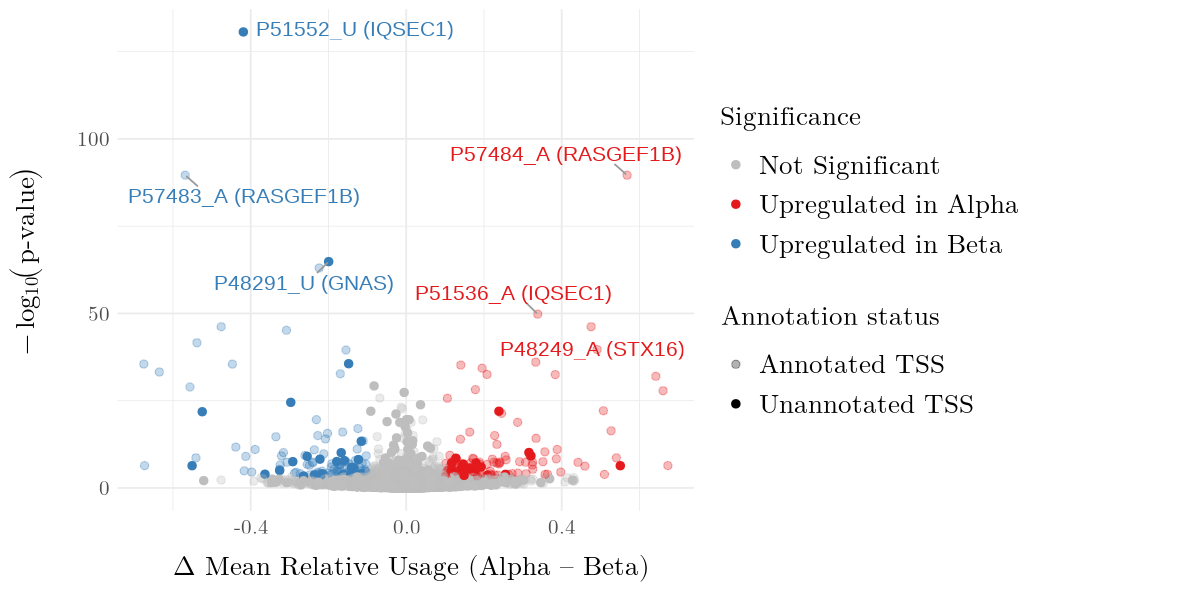

In [79]:
library(ggrepel)
options(repr.plot.width = 10, repr.plot.height = 5)

# Define highlight and top TSSs

top3_alpha <- tss_wilcox_df %>%
  filter(significance == "Upregulated in Alpha") %>%
  arrange(p_val) %>%
  slice_head(n = 3)

top3_beta <- tss_wilcox_df %>%
  filter(significance == "Upregulated in Beta") %>%
  arrange(p_val) %>%
  slice_head(n = 3)

top6 <- bind_rows(top3_alpha, top3_beta)

highlight_tss <- tss_wilcox_df %>%
  filter(significance != "Not Significant", Gene.name %in% c("GNAS", "PDE4B"))


tss_wilcox_df <- tss_wilcox_df %>%
  mutate(
    annotation_status = if_else(
      grepl("_U$", TSS_name),  # if TSS name ends with "_U"
      "Unannotated",
      "Annotated"
    )
  )

ggplot(tss_wilcox_df, aes(x = delta_psi, y = -log10(p_val))) +
  geom_point(
    aes(color = significance, alpha = annotation_status),
    size = 2
  ) +
  geom_text_repel(
    data = top6,
    aes(label = paste0(TSS_name, " (", Gene.name, ")"), color = significance),
    size = 5.5,
    box.padding = 0.5,
    max.overlaps = 10,
    segment.color = "grey60",
    force = 10,
    show.legend = FALSE
  ) +
  scale_color_manual(
    name = "Significance",
    values = c(
      "Upregulated in Alpha" = "#E41A1C",
      "Upregulated in Beta"  = "#377EB8",
      "Not Significant"      = "grey"
    )
  ) +
  scale_alpha_manual(
    name = "Annotation status",
    values = c("Annotated" = 0.3, "Unannotated" = 1),
    labels = c("Annotated TSS", "Unannotated TSS")
  ) +
  guides(
    color = guide_legend(order = 1),
    alpha = guide_legend(order = 2)
  ) +
  theme_minimal() +
  labs(
    x = expression(Delta*" Mean Relative Usage (Alpha – Beta)"),
    y = expression(-log[10]("p-value"))
  ) +
  theme(
    text = element_text(family = "Latin Modern Math"),
    axis.title   = element_text(size = 20),
    axis.text    = element_text(size = 16),
    legend.title = element_text(size = 20),
    legend.text  = element_text(size = 20),
    legend.spacing.y = unit(0.3, "cm"),
    legend.key.height = unit(0.8, "cm")
  )


In [80]:
tss_wilcox_df %>%
  arrange(desc(abs(avg_log2FC)))  %>%
  tibble::remove_rownames()

p_val,avg_log2FC,delta_psi,pct1,pct2,n_alpha,n_beta,p_val_adj,TSS_name,Gene.name,significance,annotation_status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
3.870497e-07,19.36041,0.673076923,0.01908397,0.00000000,52,20,1.877191e-05,P15955_A,FEZ1,Upregulated in Alpha,Annotated
5.186261e-04,-18.16516,-0.293939394,0.00000000,0.01818182,32,55,1.006549e-02,P3886_A,VAV3,Not Significant,Annotated
2.360700e-02,-17.78316,-0.225559947,0.00000000,0.01069519,14,33,1.730650e-01,P6388_U,PRG4,Not Significant,Unannotated
4.334878e-02,-17.62577,-0.202247191,0.00000000,0.02139037,15,89,2.427237e-01,P34603_A,ENSG00000295310,Not Significant,Annotated
5.026656e-04,17.48399,0.183317204,0.01199564,0.00000000,101,48,9.904405e-03,P56995_A,HOPX,Upregulated in Alpha,Annotated
3.336838e-02,-17.40429,-0.173464912,0.00000000,0.01818182,17,76,2.082945e-01,P47965_A,SULF2,Not Significant,Annotated
9.121566e-02,17.02674,0.133522727,0.01090513,0.00000000,128,16,3.704321e-01,P68000_A,ITGB8,Not Significant,Annotated
1.328752e-08,-16.99796,-0.130885975,0.00000000,0.01925134,197,116,9.666668e-07,P13093_A,PACSIN3,Upregulated in Beta,Annotated
7.602732e-04,-16.94961,-0.126572327,0.00000000,0.01497326,80,106,1.357787e-02,P58979_U,STOX2,Not Significant,Unannotated


In [81]:
tss_wilcox_df %>% filter(significance == "Upregulated in Alpha")

,p_val,avg_log2FC,delta_psi,pct1,pct2,n_alpha,n_beta,p_val_adj,TSS_name,Gene.name,significance,annotation_status
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
P9742-U,2.130948e-04,0.6661921,0.2092920,0.26226827,0.02673797,645,68,4.791728e-03,P9742_U,CAMK2G,Upregulated in Alpha,Unannotated
P10638-U,1.723380e-04,0.3545786,0.1112074,0.24645583,0.18716578,729,347,4.040550e-03,P10638_U,FBXW4,Upregulated in Alpha,Unannotated
P15814-U,3.006403e-09,1.0140248,0.1278310,0.17121047,0.05989305,910,338,2.499609e-07,P15814_U,ARHGEF12,Upregulated in Alpha,Unannotated
P31620-U,7.065361e-08,0.4936603,0.1796024,0.21919302,0.14973262,584,269,4.136372e-06,P31620_U,WSB1,Upregulated in Alpha,Unannotated
P42044-A,3.231358e-05,0.3779136,0.1743779,0.13958561,0.10588235,327,162,9.600917e-04,P42044_A,PEX13,Upregulated in Alpha,Annotated
P43204-A,9.674371e-16,0.8043342,0.2274740,0.25081788,0.19572193,761,453,1.595304e-13,P43204_A,ENSG00000307316,Upregulated in Alpha,Annotated
P51107-A,1.624735e-19,1.7078128,0.2865788,0.17448201,0.24278075,660,666,3.420240e-17,P51107_A,TBC1D22A,Upregulated in Alpha,Annotated
P52301-A,1.877474e-07,0.7779947,0.2073464,0.16848419,0.06310160,556,185,9.674858e-06,P52301_A,CCDC12,Upregulated in Alpha,Annotated
P66124-A,3.921259e-08,1.5770325,0.3252278,0.09160305,0.01497326,303,77,2.519282e-06,P66124_A,CEP57L1,Upregulated in Alpha,Annotated


In [82]:
tss_wilcox_df %>% filter(significance == "Upregulated in Beta")

,p_val,avg_log2FC,delta_psi,pct1,pct2,n_alpha,n_beta,p_val_adj,TSS_name,Gene.name,significance,annotation_status
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
P9744-A,2.130948e-04,-0.5676798,-0.2092920,0.21810251,0.04812834,645,68,4.791728e-03,P9744_A,CAMK2G,Upregulated in Beta,Annotated
P9761-A,1.018275e-06,-0.5707617,-0.1928738,0.11886587,0.15401070,479,227,4.558741e-05,P9761_A,AP3M1,Upregulated in Beta,Annotated
P12361-A,1.684469e-07,-0.5824701,-0.1710366,0.07960742,0.21818182,385,329,8.912372e-06,P12361_A,NCR3LG1,Upregulated in Beta,Annotated
P15799-U,7.360898e-09,-0.2247487,-0.1228971,0.40621592,0.31978610,910,338,5.689744e-07,P15799_U,ARHGEF12,Upregulated in Beta,Unannotated
P15882-U,5.652366e-09,-0.6713577,-0.2218859,0.14994547,0.14331551,622,210,4.510041e-07,P15882_U,HSPA8,Upregulated in Beta,Unannotated
P17060-U,1.471724e-08,-1.1415431,-0.1589265,0.07851690,0.10160428,760,279,1.062864e-06,P17060_U,SOX5,Upregulated in Beta,Unannotated
P20167-U,4.305969e-14,-0.3248685,-0.1155041,0.78571429,0.69946524,1656,745,6.086179e-12,P20167_U,TMEM132D,Upregulated in Beta,Unannotated
P20741-A,6.719548e-46,-1.6916767,-0.3079875,0.36477644,0.39251337,1591,594,7.387024e-43,P20741_A,ENSG00000230490,Upregulated in Beta,Annotated
P27499-A,1.893631e-05,-0.3847434,-0.1458035,0.18266085,0.20427807,627,280,6.163023e-04,P27499_A,MAPK8IP3,Upregulated in Beta,Annotated


In [83]:
tss_wilcox_df %>% filter(significance == "Upregulated in Beta")

,p_val,avg_log2FC,delta_psi,pct1,pct2,n_alpha,n_beta,p_val_adj,TSS_name,Gene.name,significance,annotation_status
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
P9744-A,2.130948e-04,-0.5676798,-0.2092920,0.21810251,0.04812834,645,68,4.791728e-03,P9744_A,CAMK2G,Upregulated in Beta,Annotated
P9761-A,1.018275e-06,-0.5707617,-0.1928738,0.11886587,0.15401070,479,227,4.558741e-05,P9761_A,AP3M1,Upregulated in Beta,Annotated
P12361-A,1.684469e-07,-0.5824701,-0.1710366,0.07960742,0.21818182,385,329,8.912372e-06,P12361_A,NCR3LG1,Upregulated in Beta,Annotated
P15799-U,7.360898e-09,-0.2247487,-0.1228971,0.40621592,0.31978610,910,338,5.689744e-07,P15799_U,ARHGEF12,Upregulated in Beta,Unannotated
P15882-U,5.652366e-09,-0.6713577,-0.2218859,0.14994547,0.14331551,622,210,4.510041e-07,P15882_U,HSPA8,Upregulated in Beta,Unannotated
P17060-U,1.471724e-08,-1.1415431,-0.1589265,0.07851690,0.10160428,760,279,1.062864e-06,P17060_U,SOX5,Upregulated in Beta,Unannotated
P20167-U,4.305969e-14,-0.3248685,-0.1155041,0.78571429,0.69946524,1656,745,6.086179e-12,P20167_U,TMEM132D,Upregulated in Beta,Unannotated
P20741-A,6.719548e-46,-1.6916767,-0.3079875,0.36477644,0.39251337,1591,594,7.387024e-43,P20741_A,ENSG00000230490,Upregulated in Beta,Annotated
P27499-A,1.893631e-05,-0.3847434,-0.1458035,0.18266085,0.20427807,627,280,6.163023e-04,P27499_A,MAPK8IP3,Upregulated in Beta,Annotated


In [84]:
promoter_switching_genes <- tss_wilcox_df %>%
  filter(significance %in% c("Upregulated in Alpha", "Upregulated in Beta")) %>%
  group_by(Gene.name) %>%
  summarise(
    has_alpha = any(significance == "Upregulated in Alpha"),
    has_beta  = any(significance == "Upregulated in Beta"),
    .groups = "drop"
  ) %>%
  filter(has_alpha & has_beta) %>% 
  pull(Gene.name) %>%
  unique() 

promoter_switching_genes

[1] "ACSL1"           "ACYP2"           "ALKBH3"          "AOPEP"          
 [5] "AP3M1"           "ARHGEF12"        "BCAR3"           "BMPR1A"         
 [9] "C2CD4A"          "CAMK2G"          "CAMTA1"          "CDHR3"          
[13] "CEP57L1"         "CNIH3"           "CNTN4"           "CREBRF"         
[17] "CRYBB2P1"        "CTNND2"          "CYS1"            "DGKG"           
[21] "DLG2"            "DST"             "ENSG00000242880" "ENSG00000255108"
[25] "FBXW4"           "FEM1B"           "FEZ1"            "FRY"            
[29] "GNAS"            "HSP90AA1"        "HSPA8"           "INTS12"         
[33] "IQSEC1"          "KANK1"           "LEPROTL1"        "LINC01214"      
[37] "LMO2"            "LURAP1"          "MBTPS2"          "MEG8"           
[41] "MYO1D"           "NCR3LG1"         "NDRG1"           "NEDD4L"         
[45] "NHSL1"           "NLGN4Y"          "PDE4B"           "PHACTR2"        
[49] "PLCB4"           "PRUNE2"          "PSMF1"           "PUM2"           
[53] "RASGEF1B"        "SIAH1"           "SLC3A2"          "SLC4A8"         
[57] "SLC6A9"          "SLC7A5"          "SOX5"            "SPPL3"          
[61] "SYBU"            "TBC1D22A"        "TENM4"           "TIAM1"          
[65] "TLE5"            "TMCC3"           "TNRC6A"          "TSC22D3"        
[69] "UBE2J1"          "VCP"             "WRNIP1"          "WSB1"           
[73] "ZNF420"          "ZNF654"

In [85]:
tss_wilcox_df %>% 
    filter(Gene.name %in% promoter_switching_genes, significance != "Not Significant") %>% 
    arrange(Gene.name)  %>%
    count(annotation_status)

annotation_status,n
<chr>,<int>
Annotated,110
Unannotated,42


In [86]:
# Unannotated TSSs in promoter-switching genes
42 / (42 + 110) *100

[1] 27.63158

In [87]:
tss_wilcox_df %>% filter(Gene.name == "C2CD4A") %>%
  tibble::remove_rownames()

p_val,avg_log2FC,delta_psi,pct1,pct2,n_alpha,n_beta,p_val_adj,TSS_name,Gene.name,significance,annotation_status
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
0.0001351234,-0.7508524,-0.161469,0.07633588,0.07593583,460,156,0.003284793,P25875_U,C2CD4A,Upregulated in Beta,Unannotated
0.0001351234,0.3427820,0.161469,0.20392585,0.11122995,460,156,0.003284793,P25872_A,C2CD4A,Upregulated in Alpha,Annotated


In [88]:
library(tidyr)

# Pick the gene of interest
target_gene <- "PDE4B"

# Get all TSSs for that gene
tsss_of_gene <- tss_wilcox_df %>%
  filter(Gene.name == target_gene, significance != "Not Significant") %>%
  {rownames(.)} %>%
  unique()

# Subset normalized matrix for those TSSs
tss_subset <- tss_mat[tsss_of_gene, , drop = FALSE]

# Convert to long data frame
tss_df <- as.data.frame(as.matrix(tss_subset)) %>%
  tibble::rownames_to_column("TSS_name") %>%
  pivot_longer(
    -TSS_name,
    names_to = "cell",
    values_to = "usage"
  )

# Add cell type info
tss_df <- tss_df %>%
  mutate(cell_type = case_when(
    cell %in% alpha_cells ~ "Alpha",
    cell %in% beta_cells  ~ "Beta",
    TRUE ~ "Other"
  )) %>%
  filter(TSS_name %in% tsss_of_gene) %>%
  filter(!is.nan(usage)) %>%
  group_by(TSS_name, cell_type) %>%
  mutate(n_cells = n()) %>%
  ungroup()


Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack




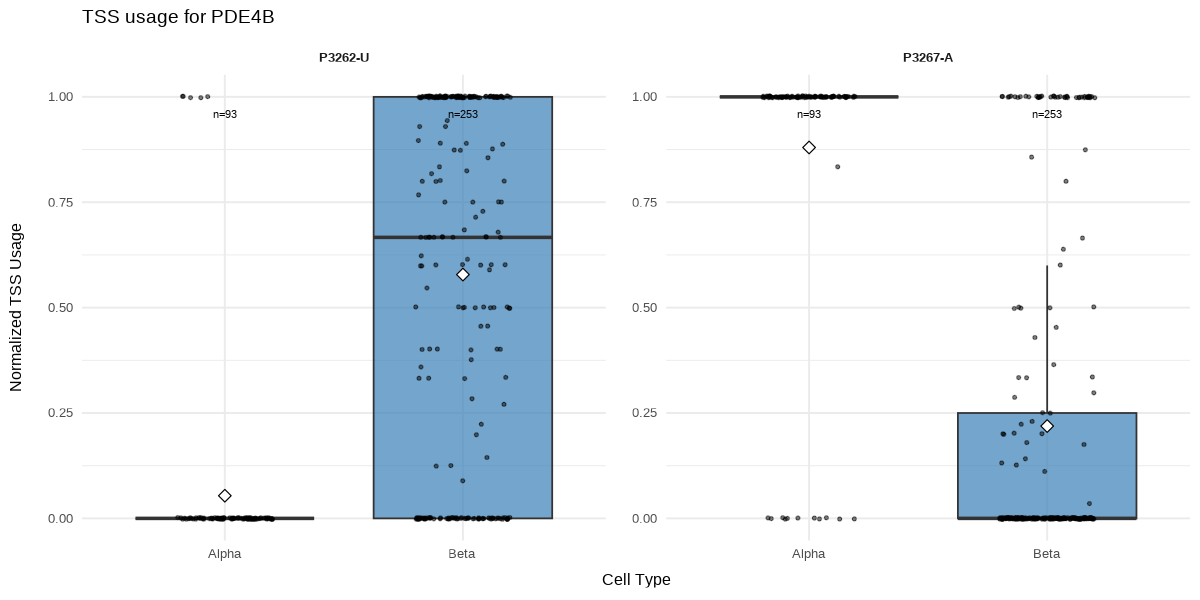

In [89]:
ggplot(tss_df, aes(x = cell_type, y = usage, fill = cell_type)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.7) +
  geom_jitter(width = 0.2, size = 0.8, alpha = 0.5) +
  facet_wrap(~ TSS_name, scales = "free_y") +
  stat_summary(fun = mean, geom = "point", shape = 23, fill = "white", size = 2.5) +
  geom_text(
    data = tss_df %>%
      group_by(TSS_name, cell_type) %>%
      summarise(n = n(), .groups = "drop"),
    aes(label = paste0("n=", n), y = max(tss_df$usage, na.rm = TRUE) * 0.95),
    size = 3,
    color = "black",
    vjust = 0
  ) +
  scale_fill_manual(values = c("Alpha" = "#E41A1C", "Beta" = "#377EB8")) +
  theme_minimal(base_size = 12) +
  labs(
    title = paste("TSS usage for", target_gene),
    x = "Cell Type",
    y = "Normalized TSS Usage"
  ) +
  theme(
    legend.position = "none",
    strip.text = element_text(face = "bold")
  )

Saving 6.67 x 6.67 in image


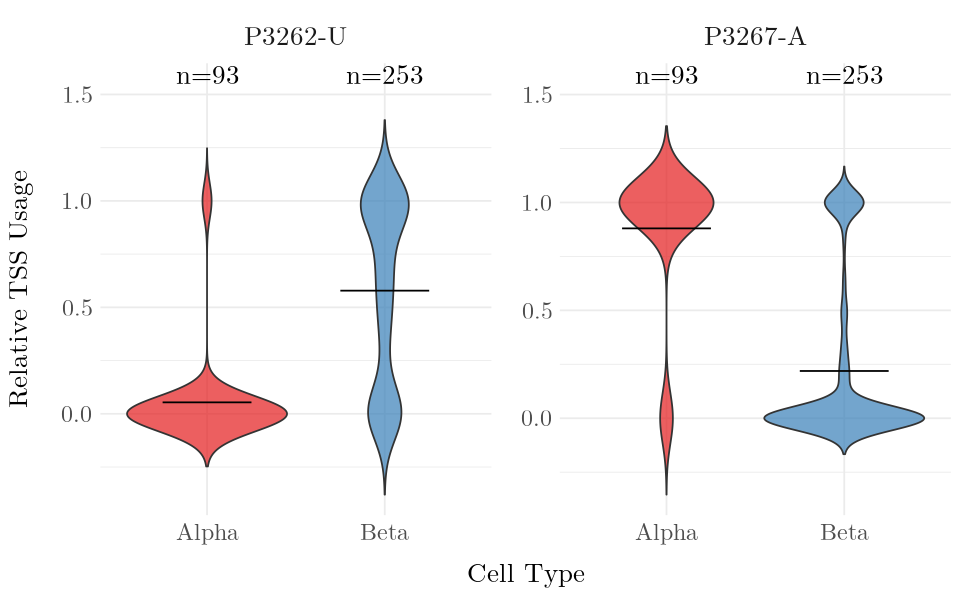

In [90]:
options(repr.plot.width = 8, repr.plot.height = 5)
p <- ggplot(tss_df, aes(x = cell_type, y = usage, fill = cell_type)) +
  geom_violin(trim = FALSE, alpha = 0.7) +
  facet_wrap(~ TSS_name, scales = "free_y") +
  stat_summary(
    fun = mean,
    geom = "crossbar",
    width = 0.5,
    color = "black",
    fatten = 1,
    linetype = "solid"
  ) +
  #stat_summary(fun = mean, geom = "point", shape = 23, fill = "white", size = 2.5) +
  geom_text(
    data = tss_df %>%
      group_by(TSS_name, cell_type) %>%
      summarise(n = n(), .groups = "drop"),
    aes(label = paste0("n=", n),
        y = max(tss_df$usage, na.rm = TRUE) * 1.55),
    size = 7,
    color = "black",
    vjust = 0,
    family = "Latin Modern Math"
  ) +
  scale_fill_manual(values = c("Alpha" = "#E41A1C", "Beta" = "#377EB8")) +
  theme_minimal() +
  labs(
    x = "Cell Type",
    y = "Relative TSS Usage"
  ) +
  theme(
    text = element_text(family = "Latin Modern Math"),
    legend.position = "none",
    strip.text = element_text(size=20),
    axis.title.x = element_text(size = 20),
    axis.title.y = element_text(size = 20),
    axis.text.x  = element_text(size = 18),
    axis.text.y  = element_text(size = 18)
  )
p
ggsave("figures/TSS_usage_violin.pdf", dpi = 300)